# Graph Analysis

Author: [Pili Hu](http://hupili.net)

[NetworkX](http://networkx.github.io/) is a pure-Python pakcage for graph analysis.
Its performance is not the best (see references).
However it has easier learning curve and has better development efficiency.

Preparation:

```
pip install --user  networkx
```


## Create graph and operate on nodes/edges

In [1]:
from matplotlib import pyplot as plt
import networkx as nx
%matplotlib inline

In [2]:
# A cool utility function for us to explore graph creation process
def visualize_graph(G, pos=None, return_internals=False):
    # ignore it, we'll come back later
    if pos is None:
        pos = pos=nx.spring_layout(G)
    nx.draw(G, pos)
    _mute = nx.draw_networkx_nodes(G, pos, node_color='#ccccff')
    _mute = nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    labels = dict((n,n) for n in G.nodes())
    _mute = nx.draw_networkx_labels(G, pos, labels=labels)
    edge_labels = {}
    for e in G.edges():
        edge_labels[e] = ','.join(['%s=%s' % (k,v) for (k, v) in G[e[0]][e[1]].items()])
    _mute = nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    if return_internals:
        return pos, labels, edge_labels

In [3]:
# Create graph
G = nx.Graph()

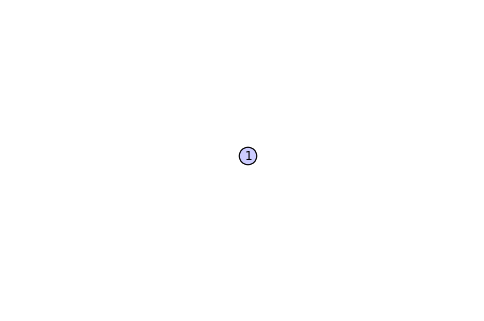

In [4]:
# Add single node
G.add_node(1)
visualize_graph(G)

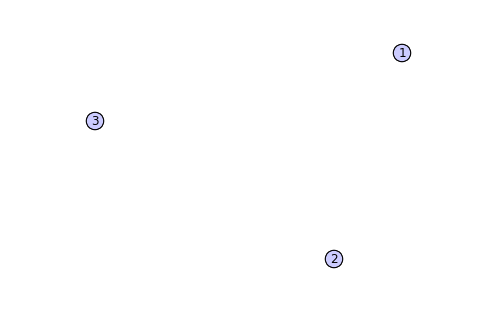

In [5]:
# Add list of node
G.add_nodes_from([2,3])
visualize_graph(G)

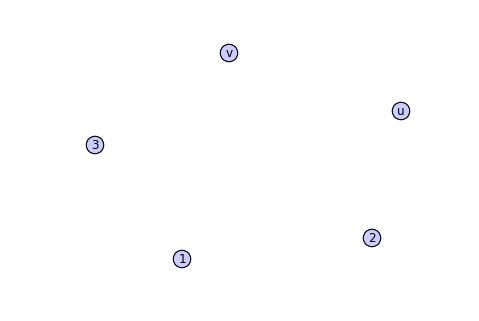

In [6]:
# Nodes can be any (hashable) type
G.add_nodes_from(['u', 'v'])
visualize_graph(G)

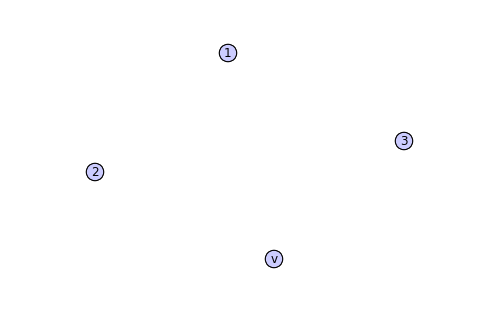

In [7]:
# Remove node
G.remove_node('u')
visualize_graph(G)

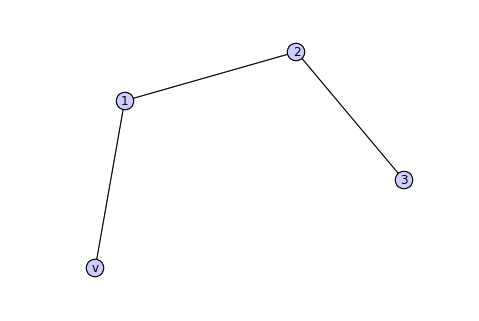

In [8]:
# Add edges
G.add_edge(1, 2)
G.add_edges_from([(2, 3), (1, 'v')])
visualize_graph(G)

In [9]:
# Get some simple statistics from the created graph
print G.nodes()
print G.edges()
print G.number_of_nodes()
print G.number_of_edges()
# Get the adjacency list of one node
print G.neighbors(1)
# Get the adjacency list of all
print G.adjacency_list()

[1, 2, 3, 'v']
[(1, 2), (1, 'v'), (2, 3)]
4
3
[2, 'v']
[[2, 'v'], [1, 3], [2], [1]]


In [10]:
# The adjacency_list() is not very useful without knowing the vertex
print G.nodes()
# Combine vertex label and adjacency_list
print dict(zip(G.nodes(), G.adjacency_list()))
# Equivalent information can be get by:
print nx.to_dict_of_dicts(G)
# Equivalent information can also be get by:
print G.edge

[1, 2, 3, 'v']
{1: [2, 'v'], 2: [1, 3], 3: [2], 'v': [1]}
{1: {2: {}, 'v': {}}, 2: {1: {}, 3: {}}, 3: {2: {}}, 'v': {1: {}}}
{1: {2: {}, 'v': {}}, 2: {1: {}, 3: {}}, 3: {2: {}}, 'v': {1: {}}}


**NOTE**: 
The dict-of-dict is networkx's internal structure for a graph

Up to now, you already have an idea of how to create a `Graph`.
It is undirected graph.
To create a directed graph, you use `DiGraph`.
The operations are similar.

**EXERCISE**:
Build a `DiGraph`

**EXERCISE**:
Build a `MultiGraph`


In [11]:
# Since G is dict-of-dict, we can use it like a dict
print G[1]
print G[1][2]

{2: {}, 'v': {}}
{}


/usr/local/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/usr/local/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


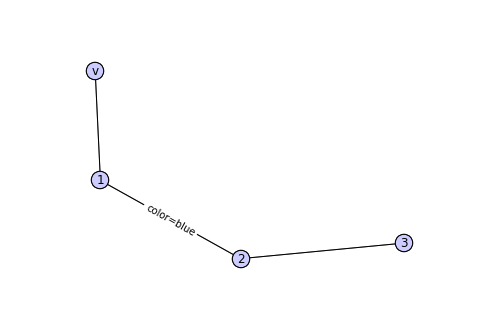

In [12]:
# Set edge attribute
G[1][2]['color'] = 'blue'
visualize_graph(G)

In [13]:
# fail if this edge does not exist
# Uncomment to see the error
#G[1][3]['color'] = 'red'

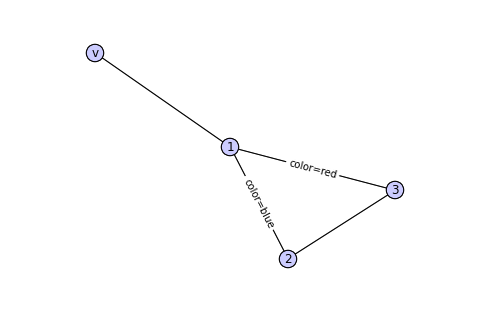

In [14]:
G.add_edge( 1, 3, {'color': 'red'})
visualize_graph(G)

In [15]:
# Iteration of nodes
for n in G.nodes_iter():
    print n

1
2
3
v


Before: {1: {2: {'color': 'blue'}, 3: {'color': 'red'}, 'v': {}}, 2: {1: {'color': 'blue'}, 3: {}}, 3: {1: {'color': 'red'}, 2: {}}, 'v': {1: {}}}
After: {1: {2: {'color': 'blue'}, 3: {'color': 'red'}, 'v': {'color': 'not sure'}}, 2: {1: {'color': 'blue'}, 3: {'color': 'not sure'}}, 3: {1: {'color': 'red'}, 2: {'color': 'not sure'}}, 'v': {1: {'color': 'not sure'}}}


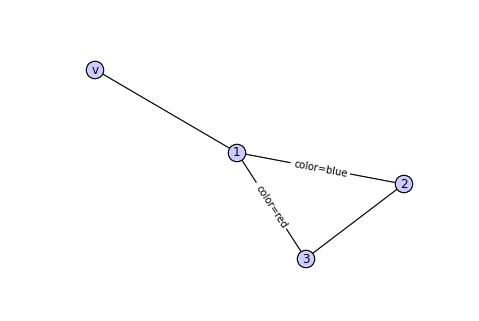

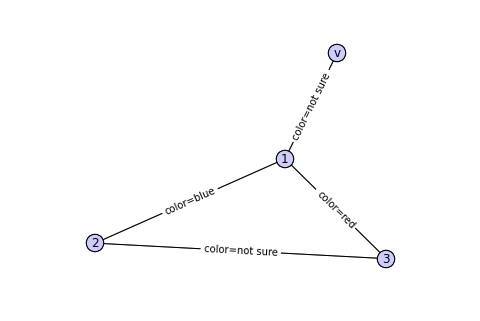

In [16]:
# Iteration of edges
print 'Before:', nx.to_dict_of_dicts(G)
visualize_graph(G)
for n,nbrs in G.adjacency_iter():
    for nbr,eattr in nbrs.items():
        if not 'color' in eattr:
            eattr['color'] = 'not sure'
print 'After:', nx.to_dict_of_dicts(G)
plt.figure()
visualize_graph(G)

See those methods with `_iter` in the name?

Python list and list-comprehension are very convenient.
However, for efficiency's sake, sometimes we don't want to store intermediate data in memory as list.
Iterators and generators are quite useful in this case.

**EXERCISE**:
Write a simple program to calcualte summation from 1 to 100000000 (a large enough number).
Compare the performance of `range` and `xrange`.

**EXERCISE**:
Self-learn `list`, `iterator` and `generator` in Python by comparison.
Highly recommended reading material for [generator](http://www.dabeaz.com/generators/index.html).

Also notice how we use `nbrs` and `eattr`.
The two dicts are mutable.
Actually, most Python modules are designed with this philosophy:
encapsulate less and give client code more flexiblity.
Usually, members of an object are not intentionally protected.

**EXERCISE**:
If you want to operate on mutable objects but do not want to affect original object, what to do?
Just get a [copy](http://docs.python.org/2/library/copy.html)

In [17]:
# Graph attributes are useful to store meta information
# e.g. name, size, where did you get it, ... 
print G.graph
G.graph['name'] = 'My Test Graph'
print G.graph

{}
{'name': 'My Test Graph'}


In [18]:
# We already see that edge can have attributes
# Nodes can also have attributes.
print G.node
print G.node[1]
G.node[1]['name'] = 'Node 1'
print G.node[1]

{1: {}, 2: {}, 3: {}, 'v': {}}
{}
{'name': 'Node 1'}


## Generate a Test Graph

In this course, we care more about real graphs.
Sometimes, you may want to automatically generate some synthetic graphs.
Different random graphs are used in research.
[Further reading](http://networkx.github.io/documentation/latest/tutorial/tutorial.html#graph-generators-and-graph-operations)
on NetworkX's built-in graph generation methods.

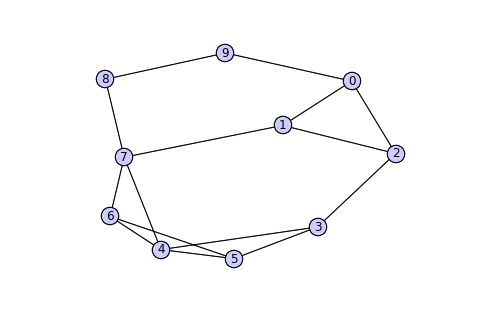

In [19]:
# Generated by the following method
# We fix one sample in this notebook to make easier for illustration
#G = nx.newman_watts_strogatz_graph(10,2, 0.2)
#_ = visualize_graph(G)
#nx.to_dict_of_dicts(G)

G = nx.from_dict_of_dicts({0: {1: {}, 2: {}, 9: {}},
 1: {0: {}, 2: {}, 7: {}},
 2: {0: {}, 1: {}, 3: {}},
 3: {2: {}, 4: {}, 5: {}},
 4: {3: {}, 5: {}, 6: {}, 7: {}},
 5: {3: {}, 4: {}, 6: {}},
 6: {4: {}, 5: {}, 7: {}},
 7: {1: {}, 4: {}, 6: {}, 8: {}},
 8: {7: {}, 9: {}},
 9: {0: {}, 8: {}}})
visualize_graph(G)

**EXERCISE**: Try other graph generators

```
>>> er=nx.erdos_renyi_graph(100,0.15)
>>> ws=nx.watts_strogatz_graph(30,3,0.1)
>>> ba=nx.barabasi_albert_graph(100,5)
>>> red=nx.random_lobster(100,0.9,0.9)
```

## Centrality measures

[Centrality](http://en.wikipedia.org/wiki/Centrality) is a classical concept in graph analysis.
It measures the "importance" of nodes.
The notions of "importance" are different.

We only provide some samples in following sections.

**EXERCISE**: 
Refer to the [documentation](http://networkx.github.io/documentation/latest/reference/algorithms.centrality.html)
and online resources to understand those centrality measures.
Try other centrality measures that are not covered in this tutorial.
What interesting findings can you get?

In [20]:
import heapq

def top_items(G, centrality):
    nodes = heapq.nlargest(5, centrality, key=lambda n: centrality[n])
    for n in nodes:
        print n, centrality[n]

In [21]:
top_items(G, nx.degree_centrality(G))

4 0.444444444444
7 0.444444444444
0 0.333333333333
1 0.333333333333
2 0.333333333333


In [22]:
top_items(G, nx.closeness_centrality(G))

7 0.642857142857
1 0.5625
4 0.5625
2 0.529411764706
3 0.529411764706


In [23]:
top_items(G, nx.betweenness_centrality(G))

7 0.351851851852
2 0.143518518519
3 0.134259259259
4 0.125
1 0.12037037037


In [24]:
top_items(G, nx.eigenvector_centrality(G))

4 0.4706600675
7 0.40080652981
6 0.389234819432
5 0.375300434544
3 0.342241027193


## PageRank

Widely used in ranking web pages. The higher PR value the higher quality (cited by high quality sources).

In [25]:
top_items(G, nx.pagerank(G))

7 0.12899624251
4 0.124458221841
0 0.104479318212
2 0.100632576134
1 0.100526734191


**EXERCISE**:
What's the difference between PageRank value and eigenvector centrality?

## Shortest Path

Note, this graph is generated from voting records.
In real life, probably they all know each other.

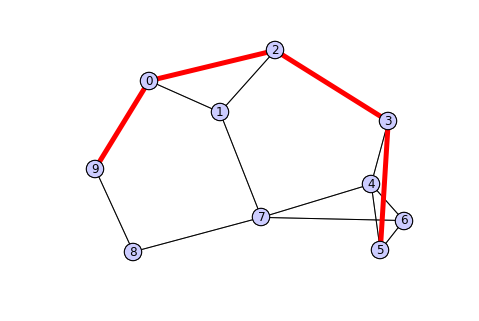

In [26]:
# Some random test to show you the usage
sp = nx.shortest_path(G, 9, 5)
pos, labels, edge_labels = visualize_graph(G, return_internals=True)
nx.draw_networkx_edges(G, 
                       pos,
                       edgelist=zip(sp[:-1], sp[1:]),
                       width=5,
                       edge_color='r'
                      )

## Connected Components

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['i', 'j']]


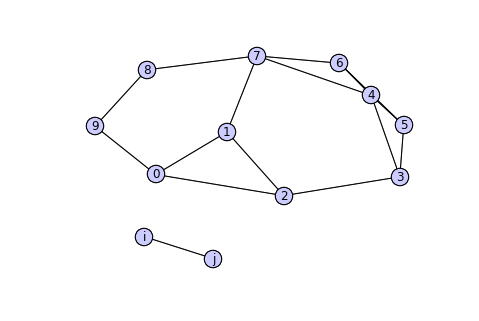

In [27]:
G.add_node('i') # isolated
G.add_node('j')
G.add_edge('i', 'j')
print list(nx.connected_components(G))
visualize_graph(G)

## More Graph Algorithms

See the list of networkx: http://networkx.lanl.gov/reference/algorithms.html

## Visualisation

`spring_layout` is force-directed graph layout.

* Attractive force along edges via Hooke's Law.
* Repulsive force between all vertices via Coulomb's Law.

Simulate the physical process to yield a stable layout.

* Wiki http://en.wikipedia.org/wiki/Force-directed_graph_drawing
* A demo video: https://www.youtube.com/watch?v=HQBMfozLa4Y

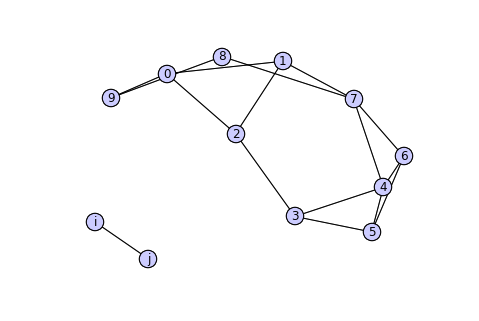

In [28]:
visualize_graph(G, pos=nx.spring_layout(G))

`spectral_layout` runs eigen value decomposition on the graph Laplacian.

$L = D - A$, where $D$ is degree matrix and $A$ is adjacency matrix.

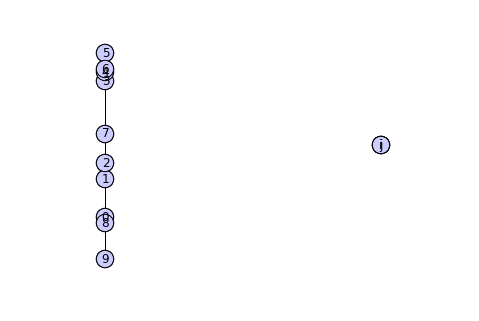

In [29]:
visualize_graph(G, pos=nx.spectral_layout(G))

`random_layout`... The name explains everything

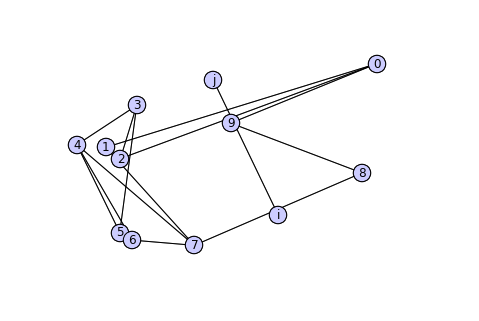

In [30]:
visualize_graph(G, pos=nx.random_layout(G))

## References

   * [networkx](http://networkx.github.io/). 
   Widely used graph library in Python.
   Basic graph data structure and graph algorithms.
   See the [official docs](http://networkx.github.io/documentation/latest/).
   * [Graph Tool](http://graph-tool.skewed.de/). It uses [Boost Graph Library](http://www.boost.org/doc/libs/1_55_0/libs/graph/doc/table_of_contents.html) for efficiency. 
   Community is as active as networkx but just smaller.
   Graph-tool can leverage multi-core via OpenMP.
   It has [better performance](http://graph-tool.skewed.de/performance) than networkx.
   * [Python Graph](https://code.google.com/p/python-graph/), last update at July, 2012. Inactive now.
   * [iGraph](http://igraph.sourceforge.net/). C implementation plus Python and R bindings. Last updated at April 2013. Inactive now.
   * [pygraphviz](http://pygraphviz.github.io/); [pydot](https://code.google.com/p/pydot/). 
   The interface to [graphviz](http://www.graphviz.org/)'s dot language,
   the most widely used open graph description language.
   